# Math(tensorflow)

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


/home/allenyl/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Mandelbrot set

- [Mandelbrot set - Wikiwand](https://www.wikiwand.com/en/Mandelbrot_set)

In [285]:
# make grid point
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

# zs initialzed to zero
zs = tf.Variable(tf.zeros_like(Z, tf.complex64))
# ns is the step count before diverge
ns = tf.Variable(tf.zeros_like(Z, tf.float32))
# c is grid point in complex
c = tf.constant(Z.astype(np.complex64))

# open session
sess = tf.InteractiveSession()
tf.initialize_all_variables().run()

# if the c satified below function, then c is belong to Mandelbrot set
zs_ = zs*zs + c
not_diverged = tf.abs(zs_) < 2

/home/allenyl/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


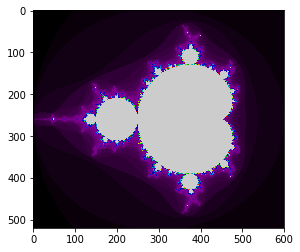

200.0
2.0


In [286]:
step = tf.group(zs.assign(zs_),
               ns.assign_add(tf.cast(not_diverged, tf.float32)))

for i in range(200):
    step.run()
    
plt.imshow(ns.eval(), cmap='nipy_spectral')
plt.show()

print(ns.eval()[300,300])
print(ns.eval()[100,200])

## Julia Set

- [Julia set - Wikiwand](https://www.wikiwand.com/en/Julia_set)

In [308]:
# make grid point
Y, X = np.mgrid[-2:2:0.005, -2:2:0.005]
Z = X+1j*Y

# zs is grid point
zs = tf.Variable(Z)
# ns is the step count before diverge
ns = tf.Variable(tf.zeros_like(Z, tf.float32))
# c is a constant complex value
c = tf.constant(complex(0.75,0.25))
#c = tf.constant(complex(-0.75,-0.25))

# open session
sess = tf.InteractiveSession()
tf.initialize_all_variables().run()

# if zs satisfied below function, then zs is belong to Julia set
zs_ = zs*zs - c
not_diverged = tf.abs(zs_) < 4

/home/allenyl/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


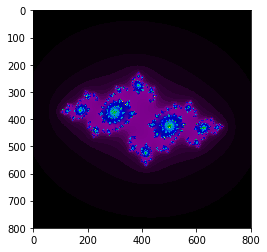

9.0
1.0


In [309]:
step = tf.group(zs.assign(zs_),
               ns.assign_add(tf.cast(not_diverged, tf.float32)))


for i in range(200):
    step.run()
    
plt.imshow(ns.eval(), cmap='nipy_spectral')
plt.show()

print(ns.eval()[300,300])
print(ns.eval()[100,200])

## Gradient

In [1]:
import tensorflow as tf


/home/allenyl/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
x = tf.placeholder(tf.float32)

y = 2*x*x*x

dy_dx = tf.gradients(y, x)

In [5]:
with tf.Session() as sess:
    grad_val = sess.run(dy_dx, feed_dict={x:1})

print(grad_val)

[6.0]


## Monte Carlo method

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [36]:
x = tf.random_uniform([1], minval=-1, maxval=1, dtype=tf.float32)
y = tf.random_uniform([1], minval=-1, maxval=1, dtype=tf.float32)

In [43]:
rounds = 1000
trials = 100
hits = 0
pi = []

with tf.Session() as sess:
    for i in range(0,rounds):
        for j in range(0,trials):
            if x.eval()**2 + y.eval()**2 < 1:
                hits +=1
        pi.append(4 * float(hits)/((i+1)*trials))

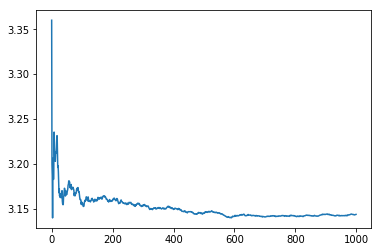

3.14392

In [47]:
plt.plot(pi)
plt.show()
pi[999]

## PDE

- [pdes.ipynb - Colaboratory](https://colab.research.google.com/github/r7vme/tensorflow-example-pdes/blob/master/pdes.ipynb#scrollTo=YSOn4v3C1pFH)

- [tensorflow-example-pdes/pdes.ipynb at master · r7vme/tensorflow-example-pdes](https://github.com/r7vme/tensorflow-example-pdes/blob/master/pdes.ipynb)

- [Partial Differential Equations  |  TensorFlow](https://www.tensorflow.org/tutorials/non-ml/pdes)

- [Laplace operator - Wikiwand](https://www.wikiwand.com/en/Laplace_operator)

- [Discrete Laplace operator - Wikiwand](https://www.wikiwand.com/en/Discrete_Laplace_operator#/Implementation_via_operator_discretization)



### Wave equation with Euler's method

In general, this problem has analytical solutions, e.g. if we restrict our waves to be monochomatic (single frequency), cylindrical waves in cylindrical coordinate system ([example](http://farside.ph.utexas.edu/teaching/315/Waves/node47.html)). So instead of brute force approximation of second derivatives, we can compute bunch of sin/cos functions and then project cylindrical coordinates to euclidean. But this at least requires careful analytical equations preparation, which can take a time. So let's look on numerical solution instead.

We want to modify a wave function $u(x,y)$, so it's values can be computed using Euler's method. For Euler we need first order differential equations, but wave function is a second order. This means we need to apply Euler's method twice.

Initial [wave equation](https://en.wikipedia.org/wiki/Wave_equation#Introduction) looks like

\begin{equation} 
 \frac{{\partial ^2 u}}{{\partial t^2 }} = {{c^2 \Delta u}}
\end{equation}

Which is a second direvative $u''$. Let's write discrete equations for $u$, where $\Delta t$ is a time difference

\begin{equation} 
 u_0(x,y) = C\\
 u_{n+1}(x,y) = u_n(x,y) + u'_n(x,y) \Delta t\\
 u'_{n+1}(x,y) = u'_n(x,y) + u''_n(x,y) \Delta t\\
\end{equation}

We know initial conditions $C$ and we also can replace $u''$ with right part of wave equation.

\begin{equation} 
 u'_{n+1}(x,y) = u'_n(x,y) + c^2 \Delta u \Delta t\\
\end{equation}

Let's also add reasoning behind wave dampling. Assuming this is a friction force, which for small speeds proportional to speed.

\begin{equation} 
 u'_{n+1}(x,y) = u'_n(x,y) + (c^2 \Delta u - k_{dampling} u'_n(x,y)) \Delta t\\
\end{equation}

Final form that is used in code is

\begin{equation}
 u_0(x,y) = C\\
 u_{n+1}(x,y) = u_n(x,y) + u'_n(x,y) \Delta t\\
 u'_{n+1}(x,y) = u'_n(x,y) + (c^2 \Delta u - k_{dampling} u'_n(x,y)) \Delta t\\
\end{equation}

### Discrete Laplacian operator
Laplacian can be a tough thing to understand actually. But let me try to explain in simple words. For detailed explanation look [here](https://ocw.mit.edu/courses/mathematics/18-03-differential-equations-spring-2010/video-lectures/lecture-19-introduction-to-the-laplace-transform/) (MIT lecture), for intuitions look [here](https://dsp.stackexchange.com/questions/11008/intuitive-interpretation-of-laplace-transform).

Small context about [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform) (easier intuition).

In our case we have some signal (wave), it was proven that **every signal can be broken into parts**. In case, of Fourier transform signal can be described as a **sum of harmonics (sinusoids)**. In other words, Fourier transform breaks **ANY** complex signal into bunch of simple sinusoids. Fourier transform is a special case of Laplace transform.

In case of Laplace transform signal can be described by it’s "moments" (i.e. mean and variance, first and second derivative respectively). Put simpler (for our case), we can extract enough information from neighbours spatial points to estimate our next value (i.e. move from spatial x,y variables to time variable only). Just to remember, Laplacian transformation allows partial differential equation (PDE) to become ordinary differential equation (ODE), which is much simpler to solve.

For numerical solutions discrete Laplace operator usually used with convolution. Most frequent use case is image edge detection. Basically we slide the image with special filter (kernel). Kernel is just a 3x3 matrix that is an rough approximation of analytical Laplace transform. Multiplying neighbour pixels values with kernel and then taking a sum of all values, gives us second derivative (i.e. speed of intensity/color change) that is then used in wave equation.

Plots of non-isotropic (left) and isotropic Laplacian kernels.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/Laplacetf.png/600px-Laplacetf.png)
[source wikipedia](https://de.wikipedia.org/wiki/Laplace-Filter)

Small note, author of Tensorflow example used kernel matrix that for some reason was multiplied by 2 (may be i'm missing smth?). According to [wikipedia](https://en.wikipedia.org/wiki/Discrete_Laplace_operator#Implementation_via_operator_discretization), isotropic Laplace convolution kernel is


\begin{bmatrix}
    0.25 & 0.5 & 0.25 \\
    0.5 & -3 & 0.5 \\
    0.25 & 0.5 & 0.25
\end{bmatrix}

One more time, **Laplacian kernel can be used to get rough approximation of the second partial derivative** of the function.


- [python - Difference between tf.nn_conv2d and tf.nn.depthwise_conv2d - Stack Overflow](https://stackoverflow.com/questions/44226932/difference-between-tf-nn-conv2d-and-tf-nn-depthwise-conv2d)

- [【Tensorflow】tf.nn.depthwise_conv2d如何实现深度卷积? - xf__mao的博客 - CSDN博客](https://blog.csdn.net/mao_xiao_feng/article/details/77938385)

    > ```python
    > out_img = tf.nn.conv2d(input=img, filter=filter, strides=[1,1,1,1], padding='VALID')
    > ```
    > 好了，用一张图来详细展示这个过程
    > 
    > ![](https://i.imgur.com/r2Bw6nI.jpg)
    > ![](https://i.imgur.com/yixHCYu.jpg)
    > 
    > 这是普通的卷积过程，我们再来看深度卷积。
    > 
    > ```python
    > out_img = tf.nn.depthwise_conv2d(input=img, filter=filter, strides=[1,1,1,1], rate=[1,1], padding='VALID')
    > ```
    > ![](https://i.imgur.com/vfN8yLb.jpg)
    > 
    > ![](https://i.imgur.com/glFGscn.jpg)


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


#Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import clear_output, Image, display

/home/allenyl/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def DisplayArray(a, fmt='jpeg', rng=[0,1]):
    """Display an array as a picture."""
    a = (a - rng[0])/float(rng[1] - rng[0])*255
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    clear_output(wait = True)
    display(Image(data=f.getvalue()))


In [3]:
def make_kernel(a):
    """Transform a 2D array into a convolution kernel"""
    a = np.asarray(a)
    #print(a)
    #print(a.shape)
    a = a * 0.5
    
    #print(a)
    a = a.reshape(list(a.shape) + [1,1])
    #print(a.shape)
    return tf.constant(a, dtype=1)

def simple_conv(x, k):
    """A simplified 2D convolution operation"""
    #print(x.shape)
    x = tf.expand_dims(tf.expand_dims(x, 0), -1)
    #print(x.shape)
    y = tf.nn.depthwise_conv2d(x, k, [1, 1, 1, 1], padding='SAME')
    return y[0, :, :, 0]

def laplace(x):
    """Compute the 2D laplacian of an array"""
    laplace_k = make_kernel([[0.5, 1.0, 0.5],
                           [1.0, -6., 1.0],
                           [0.5, 1.0, 0.5]])
    return simple_conv(x, laplace_k)

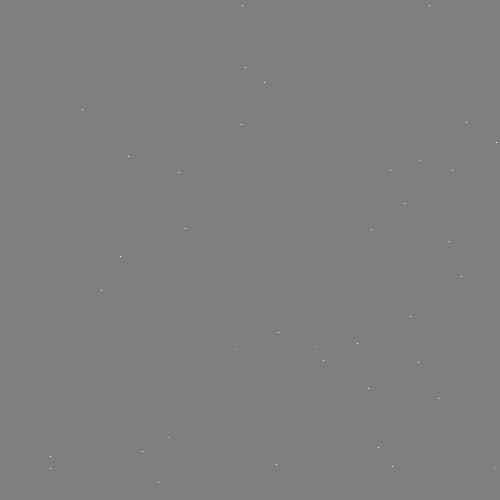

In [4]:
N = 500

u_init = np.zeros([N,N], dtype=np.float32)

for n in range(40):
    a,b = np.random.randint(0,N,2)
    u_init[a,b] = np.random.uniform()
    
DisplayArray(u_init, rng=[-0.1, 0.1])

ut_init = np.zeros([N,N], dtype=np.float32)
damping_init = np.zeros([], dtype=np.float32)
time_init = np.zeros([], dtype=np.float32)

eps = tf.placeholder(tf.float32, shape=())

#damping = tf.placeholder(tf.float32, shape=())


In [5]:
U = tf.Variable(u_init)
Ut = tf.Variable(ut_init)
damping = tf.Variable(damping_init)
time = tf.Variable(time_init)

# U' = (U_-U)/eps = Ut
U_ = U + eps * Ut
# U'' = (Ut_-Ut)/eps = laplace(U) - damping * Ut
Ut_ = Ut + eps * (laplace(U) - damping * Ut)
# time evolution
time_ = time + eps


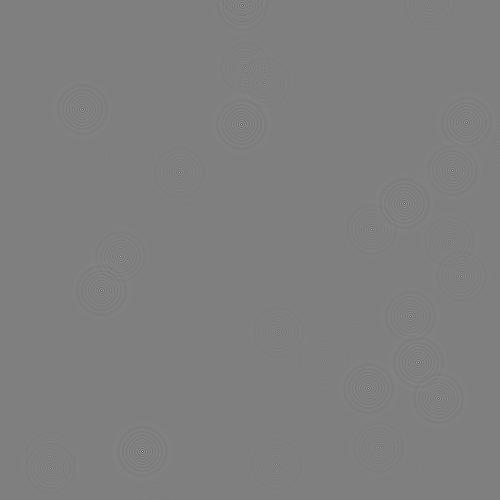

In [6]:
# time dependant damping
damping1_ = (0.04*tf.exp(0.07*time))

step = tf.group(U.assign(U_), Ut.assign(Ut_), damping.assign(damping1_), time.assign(time_))

with tf.Session() as sess:
    tf.initialize_all_variables().run()
    
    for i in range(1000):
        step.run(feed_dict={eps:0.03})
        if i % 50 == 0:
#             #plt.clf()
#             #clear_output()
#             plt.imshow(U.eval())
#             plt.gray()
#             plt.show()
            DisplayArray(U.eval(), rng=[-0.1, 0.1])

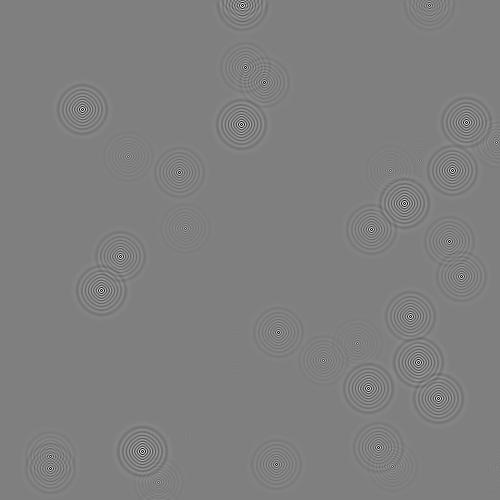

In [33]:
# time dependant damping
damping2_ = 0.04

step = tf.group(U.assign(U_), Ut.assign(Ut_), damping.assign(damping2_), time.assign(time_))

%matplotlib notebook

with tf.Session() as sess:
    tf.initialize_all_variables().run()
    #fig = plt.figure(figsize=(6,6))
    #plt.show()
    for i in range(1000):
        step.run(feed_dict={eps:0.03})
        if i % 50 == 0:
            #plt.clf()
            #clear_output()
            #plt.imshow(U.eval(), cmap='RdGy')
            #plt.gray()
            #fig.canvas.draw_idle()
            #plt.show()
            DisplayArray(U.eval(), rng=[-0.1, 0.1])


## Lorenz attractor

- [Integrate (contrib)  |  TensorFlow](https://www.tensorflow.org/api_guides/python/contrib.integrate)

- [Lorenz system - Wikiwand](https://www.wikiwand.com/en/Lorenz_system)

> ![{\begin{aligned}{\frac {\mathrm {d} x}{\mathrm {d} t))&=\sigma (y-x),\\{\frac {\mathrm {d} y}{\mathrm {d} t))&=x(\rho -z)-y,\\{\frac {\mathrm {d} z}{\mathrm {d} t))&=xy-\beta z.\end{aligned))](https://wikimedia.org/api/rest_v1/media/math/render/svg/5f993e17e16f1c3ea4ad7031353c61164a226bb8)

<IPython.core.display.Javascript object>


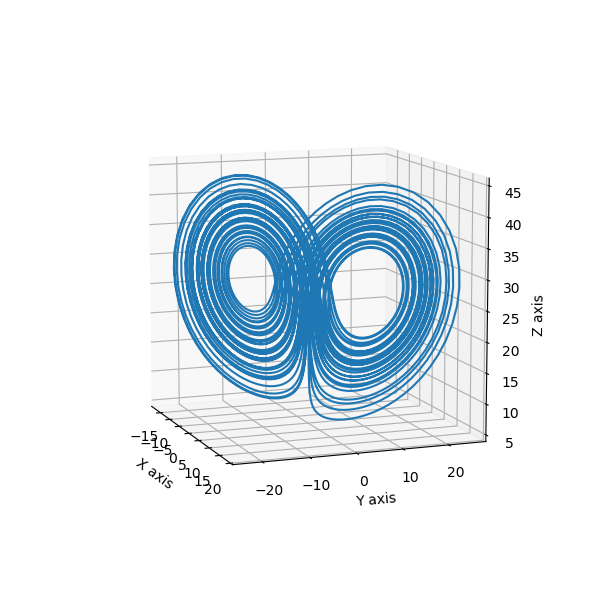

In [38]:
rho = 28.0
sigma = 10.0
beta = 8.0/3.0

def lorenz_equation(state, t):
    x, y, z = tf.unstack(state)
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return tf.stack([dx, dy, dz])

init_state = tf.constant([0, 2, 20], dtype=tf.float64)
t = np.linspace(0, 50, num=5000)
tensor_state, tensor_info = tf.contrib.integrate.odeint(
    lorenz_equation, init_state, t, full_output=True)

sess = tf.Session()
state, info = sess.run([tensor_state, tensor_info])
x, y, z = state.T
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.plot(x, y, z)
plt.show()


## interactive figure

- [Clear MatPlotLib figure in Jupyter Python notebook - Stack Overflow](https://stackoverflow.com/questions/42998009/clear-matplotlib-figure-in-jupyter-python-notebook)

<IPython.core.display.Javascript object>


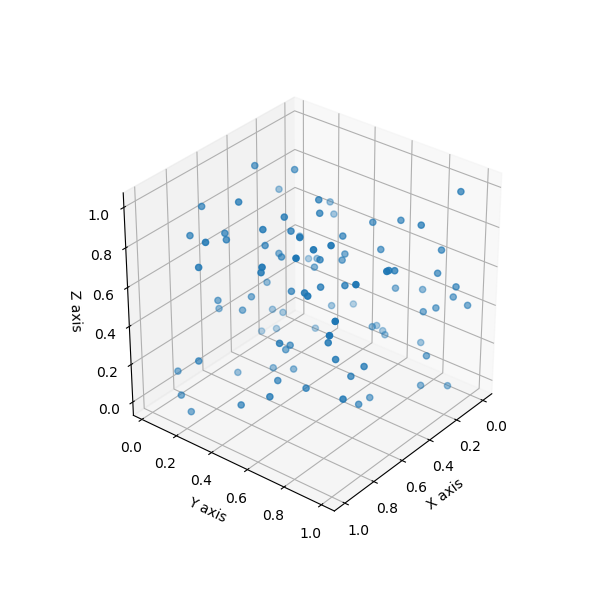

IntSlider(value=20, max=60)

Label(value='Angle 1 value is: 20')

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display
# inline active widget
%matplotlib notebook

# generate test data
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.scatter(x, y, z)
ax.view_init(20, 40)
# show plot
plt.show()

def update_plot(angle1 = 20, angle2 = 40):
    # set view angle
    ax.view_init(angle1, angle2)
    fig.canvas.draw_idle()

# prepare widgets
angle1_slider = widgets.IntSlider(20, min = 0, max = 60)
angle1_label = widgets.Label(value = 'Angle 1 value is: ' + str(angle1_slider.value))
display(angle1_slider, angle1_label)

# handle angle 1 update
def update_angle1(value):
    update_plot(angle1 = value['new'])
    angle1_label.value = 'Angle 1 value is: ' + str(value.new)

angle1_slider.observe(update_angle1, names = 'value')